In [1]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import json

In [19]:
base_path = '../../datasets/babynames/yob%d.txt'
pieces = []
for y in range(1880, 2011):
    path = base_path % y
    tmp_df = pd.read_csv(path, header=None, names=['name', 'sex', 'births'])
    tmp_df['year'] = y
    pieces.append(tmp_df)

df = pd.concat(pieces, ignore_index=True)
df1 = df.copy()
df1.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   sex     1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [22]:
df1['sex'] = df['sex'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype   
---  ------  --------------    -----   
 0   name    1690784 non-null  object  
 1   sex     1690784 non-null  category
 2   births  1690784 non-null  int64   
 3   year    1690784 non-null  int64   
dtypes: category(1), int64(2), object(1)
memory usage: 40.3+ MB


In [26]:
total_births = df1.pivot_table('births', columns='sex', index='year', aggfunc='sum')
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


In [33]:
data = total_births.unstack()
data.name = 'total'
data = data.reset_index()
data.head()

,sex,year,total
0,F,1880,90993
1,F,1881,91955
2,F,1882,107851
3,F,1883,112322
4,F,1884,129021


<AxesSubplot:xlabel='year', ylabel='total'>

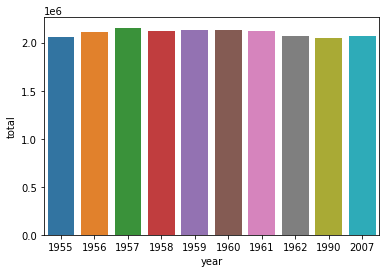

In [37]:
sns.barplot(x='year', y='total', data=data.nlargest(n=10, columns='total'))

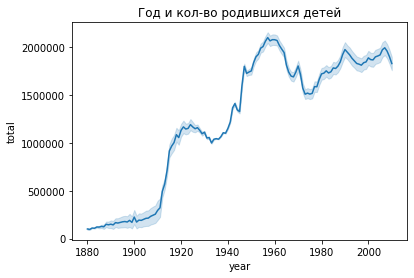

In [51]:
lineplot = sns.lineplot(x='year', y='total', data=data)
lineplot.set_title('Год и кол-во родившихся детей')
lineplot.ticklabel_format(style='plain')

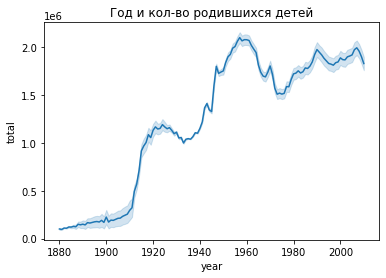

In [53]:
lineplot = sns.lineplot(x='year', y='total', data=data).set_title('Год и кол-во родившихся детей')

In [78]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
gr = df1.groupby(['year', 'sex']).apply(add_prop)
gr.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [79]:
(gr.groupby(['year','sex']).prop.sum() > 1 ).any()

False

In [94]:
top1000 = gr.groupby(['year', 'sex']).apply(lambda x: x.nlargest(columns='prop', n=1000)).reset_index(drop=True)
boys = top1000[top1000['sex'] == 'M']
girls = top1000[top1000['sex'] == 'F']
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [109]:
pv_t = top1000.pivot_table('births', columns='name', index='year', aggfunc='sum')[['John', 'Harry', 'Mary', 'Marilyn']].unstack().reset_index()
pv_t.head()

,name,year,0
0,John,1880,9701.0
1,John,1881,8795.0
2,John,1882,9597.0
3,John,1883,8934.0
4,John,1884,9427.0


Text(0.5, 1.0, 'Number of births per year')

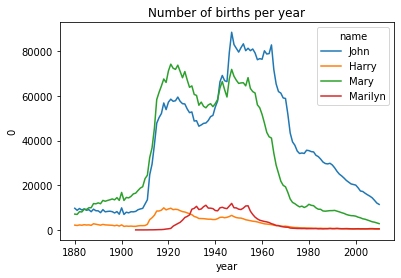

In [122]:
sns.lineplot(x='year', y=0, hue='name', data=pv_t).set_title("Number of births per year")

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

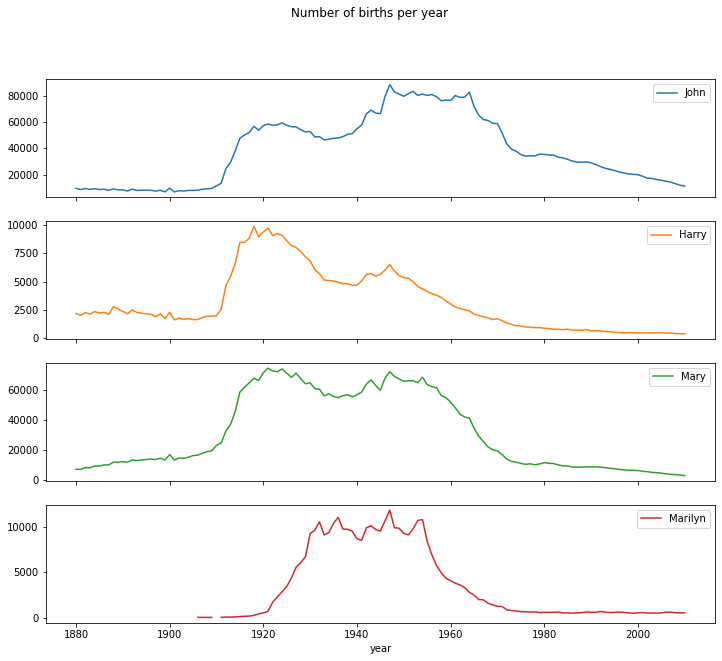

In [119]:
top1000.pivot_table('births', columns='name', index='year', aggfunc='sum')[['John', 'Harry', 'Mary', 'Marilyn']].plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

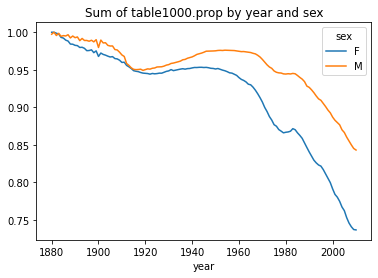

In [131]:
pv_t = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
pv_t.plot(title='Sum of table1000.prop by year and sex')

In [139]:
b2010 = boys[boys.year == 2010].sort_values(by='prop', ascending=False)
b2010.head()

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887


In [140]:
ps = b2010.prop.cumsum()
ps.head()

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
Name: prop, dtype: float64

In [141]:
ps.searchsorted(0.5)

116

In [146]:
def get_q_names(group, q=0.5):
    return group.sort_values(by='prop', ascending=False).prop.cumsum().searchsorted(q) + 1

In [148]:
data = top1000.groupby(['year','sex']).apply(get_q_names).unstack()
data.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

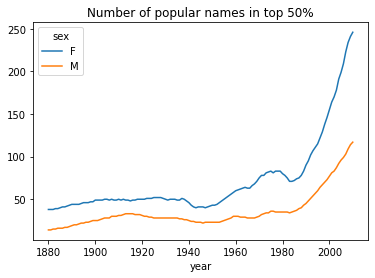

In [149]:
data.plot(title="Number of popular names in top 50%")